In [1]:
import numpy as np

def quickJaccard(data1, data2):
    """
    A function calculating the overlap for two datasets
    """
    # 1. The overlap range judging
    left = np.min(np.where(np.max(data1) == np.max([data1, data2]), data1, data2))
    right = np.max(np.where(np.min(data1) == np.min([data1, data2]), data1, data2))
    #print(left,right)
    # 2. Pre-Judge if overlap range is empty
    if left > right:
        return 0 # No overlap, hence no common items, Jaccard Index is zero now
    # 3. Counting overlap items
    joinList = sorted(np.concatenate([data1, data2])) # sorted whole list of data

    count = 0 # init count to zero
    for point in joinList:
        if point < right: # Judge the upper cap
            if point > left: # Judge the lower cap
                count += 1
        else:
            break # Stop iteration if exceed upper cap
    #print(count)
    return count/len(joinList) # JaccardIndex: #InterceptionSet / #UnionSet



In [2]:
data1 = np.random.rand(100)
data2 = np.random.rand(100) + 0.2
quickJaccard(data1, data2)

0.74

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:25<00:00,  3.87it/s]


The output result shape is set as (n_samples, n_features, n_steps)


(100, 50, 10000)

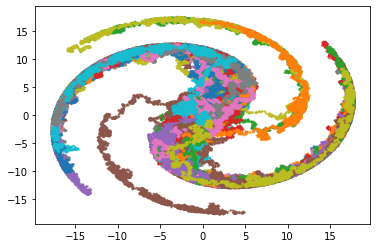

In [3]:
# Next, prepare some 2D data for calculating
import MLTSA
spiral_2b_raw = MLTSA.datasets.two_d_generate_traj('s2', 100, True)

s2_processor = MLTSA.datasets.two_d_data_processor('s2')
s2_trajs, s2_labels = MLTSA.datasets.two_d_data_process_full(s2_processor, spiral_2b_raw, 25)

s2_projector = MLTSA.datasets.two_d_data_projector('grid')
# This projector default project data to rotated X axis
s2_features = MLTSA.datasets.two_d_data_projection(s2_projector, s2_trajs)
s2_features.shape
# To calculate the JaccardIndex, need computing the distribution of each feature
s2_features = s2_features.reshape(100,50,10000)
s2_features.shape

In [4]:
joint = s2_features.reshape(100, 50*10000)

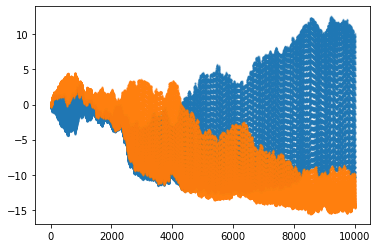

In [5]:
from matplotlib import pyplot as plt
for i in range(len(s2_features[2])):
    plt.plot(s2_features[2][i], "-o", color="C{}".format(s2_labels[i]), lw=0, markersize=1, alpha=0.2)

In [6]:
s2_features[2].shape

(50, 10000)

In [7]:
np.concatenate(s2_features[2,:25,:].T, axis=0).shape

(250000,)

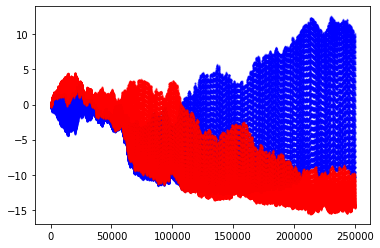

In [8]:
plt.plot(np.concatenate(s2_features[2,:25,:].T, axis=0), c='b', marker='o', markersize=1, lw=0, alpha=0.2)
plt.plot(np.concatenate(s2_features[2,25:,:].T, axis=0), c='r', marker='o', markersize=1, lw=0, alpha=0.2)

<AxesSubplot:ylabel='Count'>

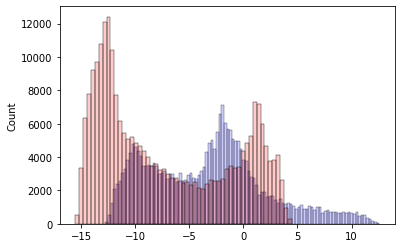

In [9]:
import seaborn as sns
sns.histplot(np.concatenate(s2_features[2,:25,:].T, axis=0), color='b', alpha=0.2)
sns.histplot(np.concatenate(s2_features[2,25:,:].T, axis=0), color='r', alpha=0.2)


In [19]:
from tqdm import tqdm
JI = []
for index in tqdm(range(len(s2_features))):
    data1 = np.concatenate(s2_features[index,:25,100:500].T, axis=0) # Data of label 0
    data2 = np.concatenate(s2_features[index,25:,100:500].T, axis=0) # Data of label 1
    JI.append(quickJaccard(data1, data2))

100%|██████████| 100/100 [00:01<00:00, 57.32it/s]


In [20]:
[index for index in range(len(JI)) if JI[index] == np.max(JI)]

[36, 37, 50, 51, 56, 57, 60, 61, 70]

In [21]:
[index for index in range(len(JI)) if JI[index] == np.min(JI)]

[2]

In [22]:
np.max(JI), np.min(JI)

(0.9999, 0.2015)

<AxesSubplot:ylabel='Count'>

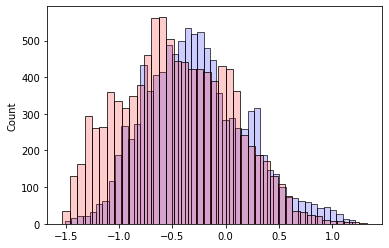

In [25]:
import seaborn as sns
index = 36
sns.histplot(np.concatenate(s2_features[index,:25,100:500].T, axis=0), color='b', alpha=0.2)
sns.histplot(np.concatenate(s2_features[index,25:,100:500].T, axis=0), color='r', alpha=0.2)


<AxesSubplot:ylabel='Count'>

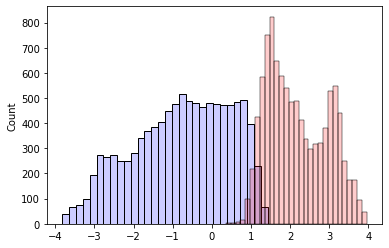

In [26]:
import seaborn as sns
index = 2
sns.histplot(np.concatenate(s2_features[index,:25,100:500].T, axis=0), color='b', alpha=0.2)
sns.histplot(np.concatenate(s2_features[index,25:,100:500].T, axis=0), color='r', alpha=0.2)


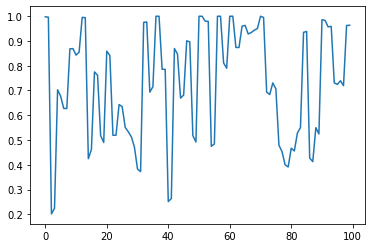

In [27]:
plt.plot(JI)

In [29]:
np.where(np.array(JI) < 0.5)

(array([ 2,  3, 14, 15, 19, 29, 30, 31, 40, 41, 49, 54, 55, 76, 77, 78, 79,
        80, 81, 86, 87]),)

<AxesSubplot:ylabel='Count'>

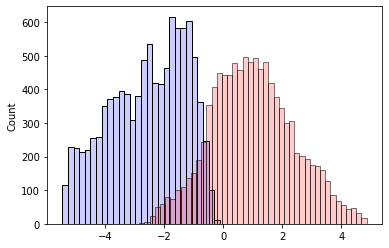

In [32]:
import seaborn as sns
index = 87
sns.histplot(np.concatenate(s2_features[index,:25,100:500].T, axis=0), color='b', alpha=0.2)
sns.histplot(np.concatenate(s2_features[index,25:,100:500].T, axis=0), color='r', alpha=0.2)
